# Data Merge & ML

Unificamos los Dataset despues de haberlos limpiado y organizado para crear un único dataset sobre el que hacer los modelos de ML.

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
# Leemos los dataset generados anteriormente
df_twitch_data = pd.read_csv('Twitch data processed.csv')
df_steam_data = pd.read_csv('Steam data processed.csv')
df_twitch_data_2020 = pd.read_csv('Twitch data games post covid.csv')
df_steam_data_2020 = pd.read_csv('Steam data games post covid.csv')

In [31]:
# Cambiamos los nombres de las columnas para que sea más fácil mergear los datasets
df_steam_data.rename(columns={'gamename':'Game','avg':'Avg_players','gain':'Gain_players', 'peak':'Peak_players', 'avg_peak_perc':'avg_peak_perc_players',}, inplace=True)
df_steam_data.head()

,Game,year,month,Avg_players,Gain_players,Peak_players,avg_peak_perc_players,date
0,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%,2021-02-01
1,Counter-Strike: Global Offensive,2021,January,743209.66,25405.91,1124553,66.0893%,2021-01-01
2,Counter-Strike: Global Offensive,2020,December,717803.75,49049.17,1164396,61.646%,2020-12-01
3,Counter-Strike: Global Offensive,2020,November,668754.58,55087.89,1037464,64.4605%,2020-11-01
4,Counter-Strike: Global Offensive,2020,October,613666.69,6816.37,943876,65.0156%,2020-10-01


Al tener las columnas de 'Game' y 'data' preprocesadas en los dos datasets en merge no le indicamos las columnasp por las que tiene que unir. Dejaremos que haga un innerjoin con las 2 columnas para obtener los datos totales. Como en el dataset de twitch también teníamos las categorías como valores no se muestran en el dataset final, nos centraremos solamente en los videojuegos.


In [32]:
df = pd.merge(df_twitch_data, df_steam_data)

Comprobamos que los datos se hayan unido bien por fechas con pd.sample

In [33]:
df[['Month', 'Year','month', 'year', 'date']].sample(n=10)

,Month,Year,month,year,date
1399,8,2017,August,2017,2017-08-01
3361,11,2019,November,2019,2019-11-01
379,6,2016,June,2016,2016-06-01
3776,4,2020,April,2020,2020-04-01
3949,7,2020,July,2020,2020-07-01
1539,10,2017,October,2017,2017-10-01
2454,10,2018,October,2018,2018-10-01
3369,11,2019,November,2019,2019-11-01
3772,4,2020,April,2020,2020-04-01
2202,6,2018,June,2018,2018-06-01


In [9]:
df.dtypes

Rank                  int64
Game                 object
Month                 int64
Year                  int64
Hours_watched         int64
Hours_Streamed       object
Peak_viewers          int64
Peak_channels         int64
Streamers             int64
Avg_viewers           int64
Avg_channels          int64
Avg_viewer_ratio    float64
Day                   int64
date                 object
year                  int64
month                object
avg                 float64
gain                float64
peak                  int64
avg_peak_perc        object
dtype: object

In [34]:
# Dropping irrelevant columns
df = df.drop(['Month', 'Year','month', 'year', 'Day'], axis=1)
df.head(5)

,Rank,Game,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,date,Avg_players,Gain_players,Peak_players,avg_peak_perc_players
0,2,Counter-Strike: Global Offensive,47832863,830105 hours,372654,2197,120849,64378,1117,57.62,2016-01-01,365371.09,-12076.02,667432,54.7428%
1,3,Dota 2,45185893,433397 hours,315083,1100,44074,60815,583,104.26,2016-01-01,612174.78,38830.53,1067949,57.3225%
2,5,Call of Duty: Black Ops III,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03,2016-01-01,14292.49,-3074.66,30760,46.4645%
3,16,Tom Clancy's Rainbow Six Siege,4866039,242134 hours,25742,694,42244,6549,325,20.10,2016-01-01,10244.29,2302.84,20006,51.2061%
4,19,Grand Theft Auto V,4014296,407172 hours,32724,1197,85441,5402,548,9.86,2016-01-01,46993.33,3118.61,93726,50.1391%


In [35]:
df.isnull().sum()

Rank                       0
Game                       0
Hours_watched              0
Hours_Streamed             0
Peak_viewers               0
Peak_channels              0
Streamers                  0
Avg_viewers                0
Avg_channels               0
Avg_viewer_ratio           0
date                       0
Avg_players                0
Gain_players             139
Peak_players               0
avg_peak_perc_players      0
dtype: int64

In [16]:
df = df.dropna() 
df.count()

Rank                4354
Game                4354
Hours_watched       4354
Hours_Streamed      4354
Peak_viewers        4354
Peak_channels       4354
Streamers           4354
Avg_viewers         4354
Avg_channels        4354
Avg_viewer_ratio    4354
date                4354
avg                 4354
gain                4354
peak                4354
avg_peak_perc       4354
dtype: int64

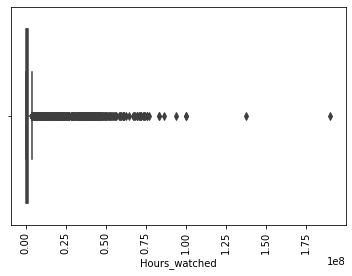

In [20]:
ax = sns.boxplot(data=df, x='Hours_watched')
for item in ax.get_xticklabels():
    item.set_rotation(90)

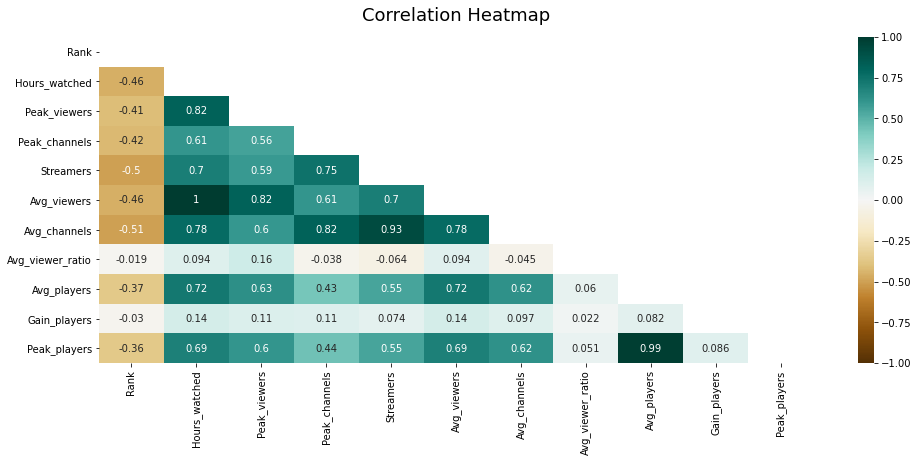

In [36]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

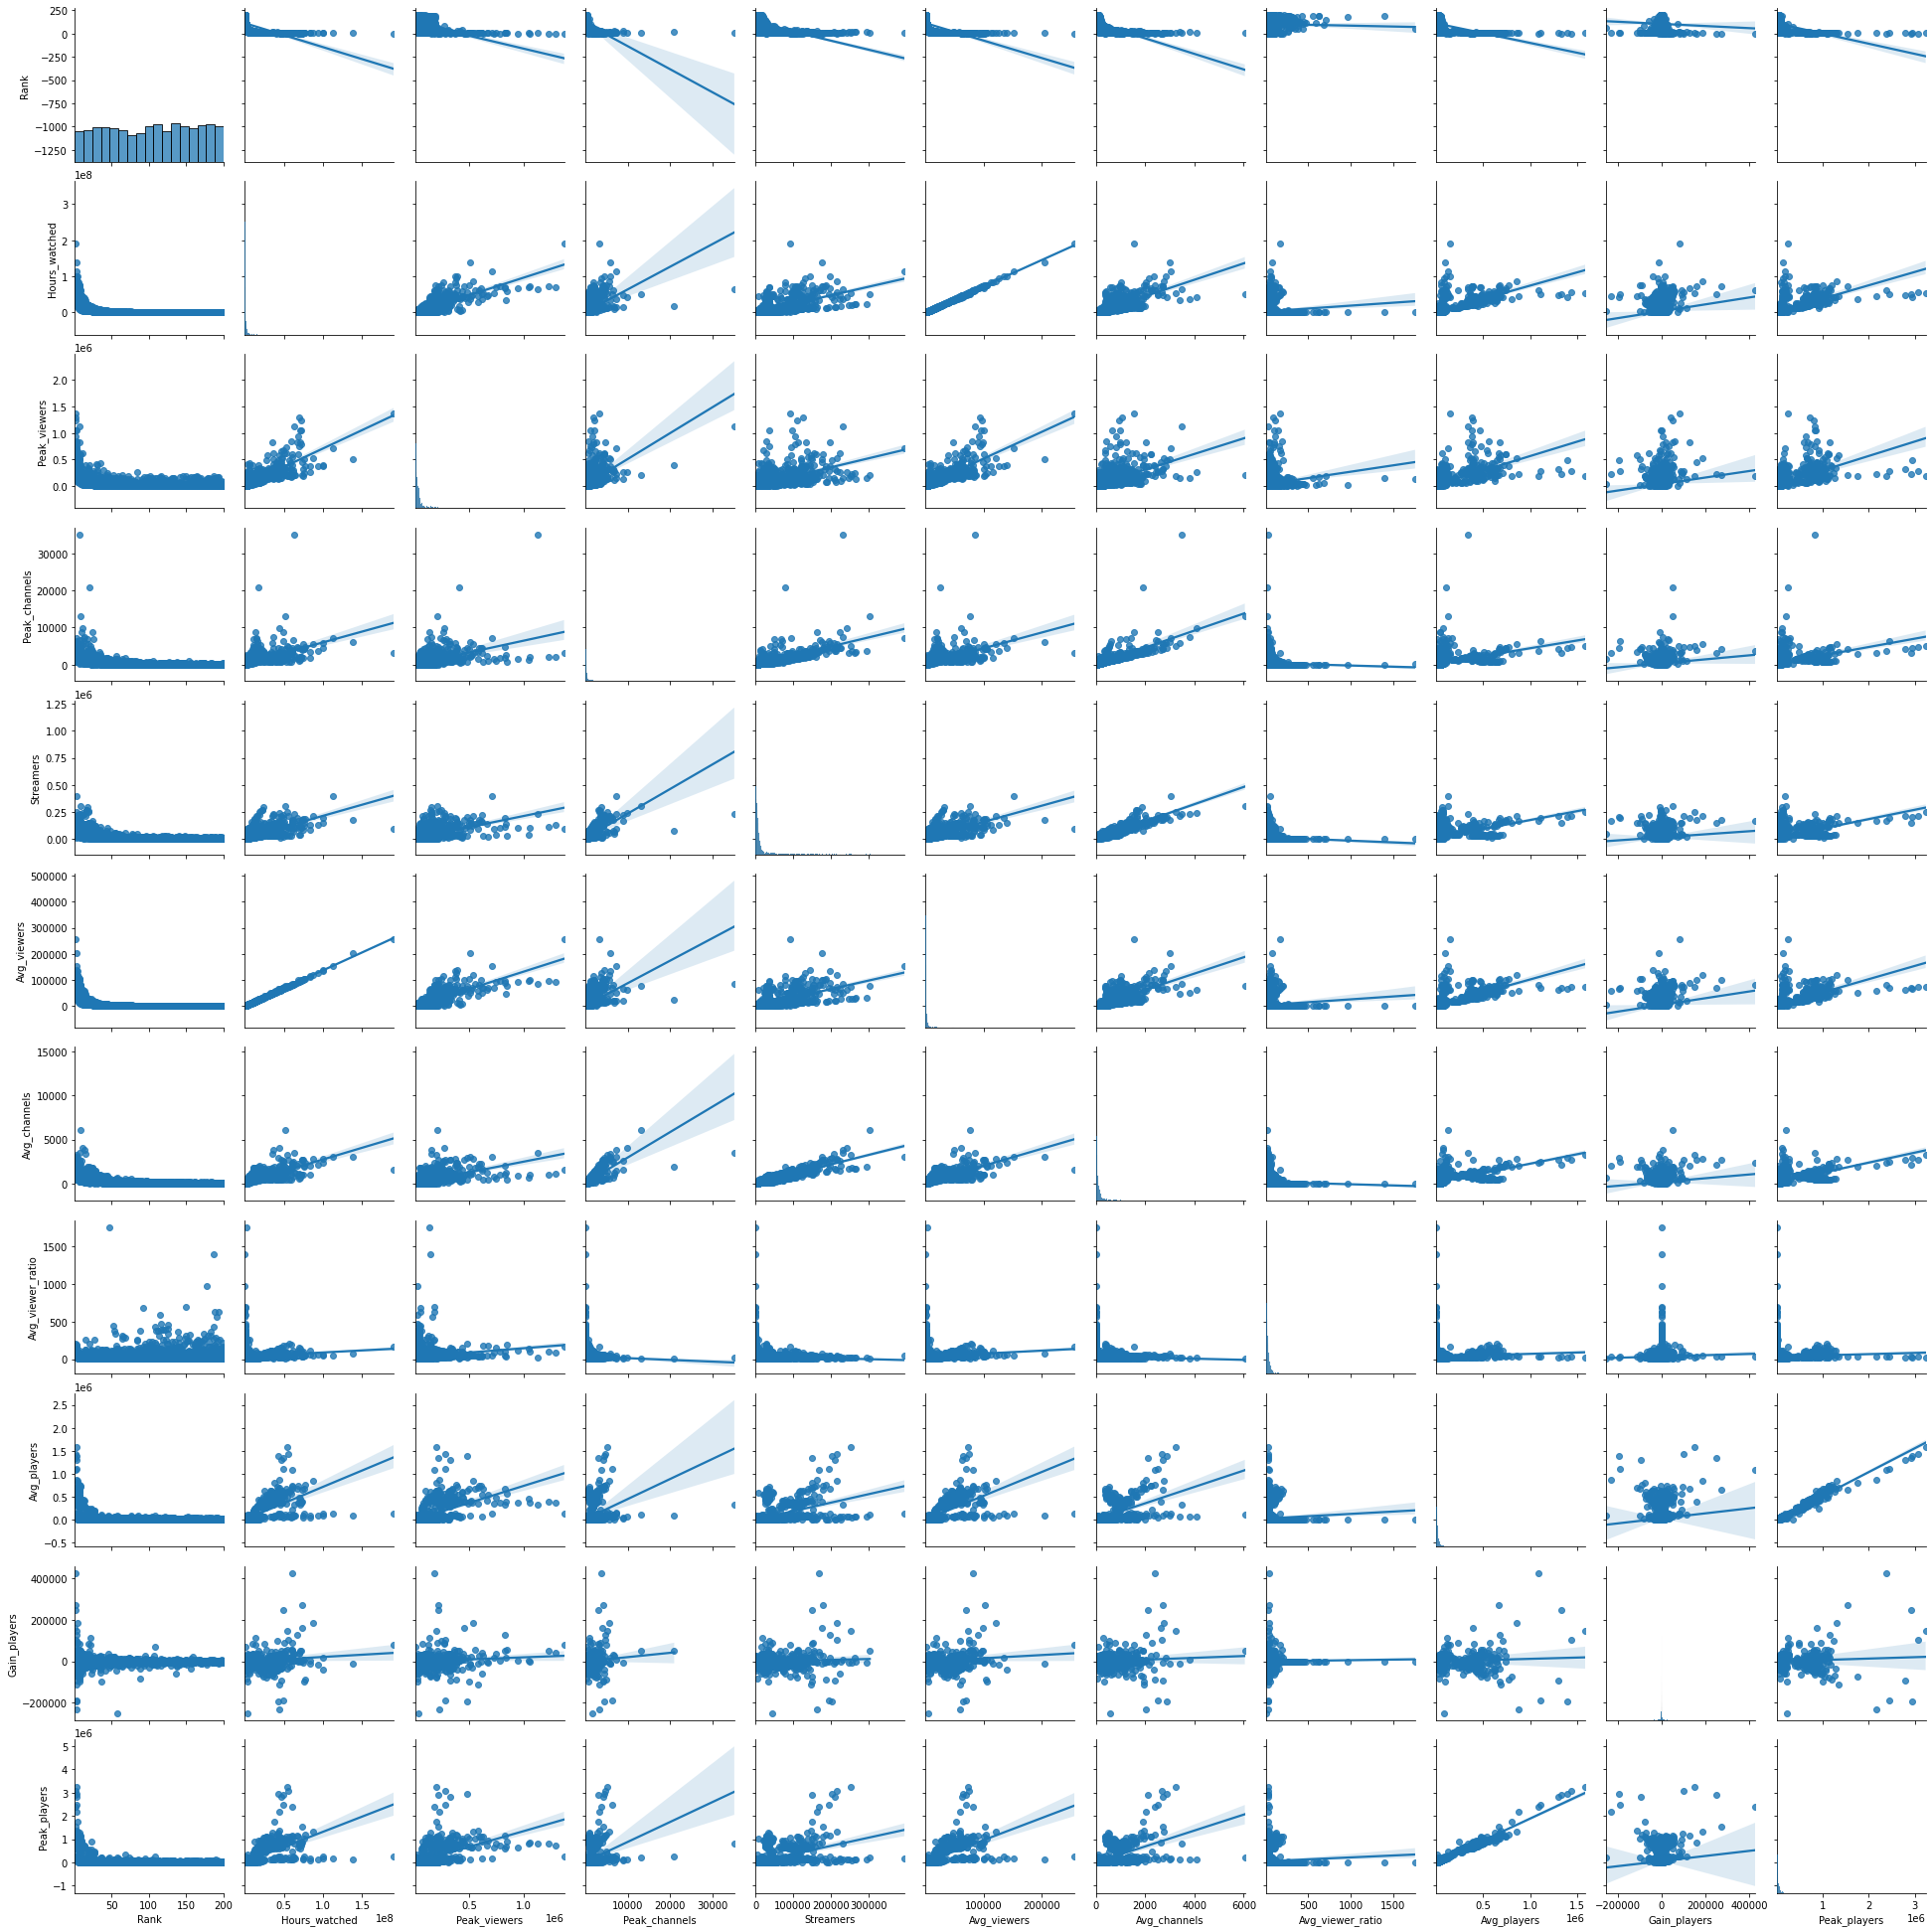

In [37]:
sns.pairplot(df, kind="reg")
plt.show()

/home/dsc/anaconda3/envs/tfm/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dsc/anaconda3/envs/tfm/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dsc/anaconda3/envs/tfm/lib/python3.9/site-packages/seaborn/distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning

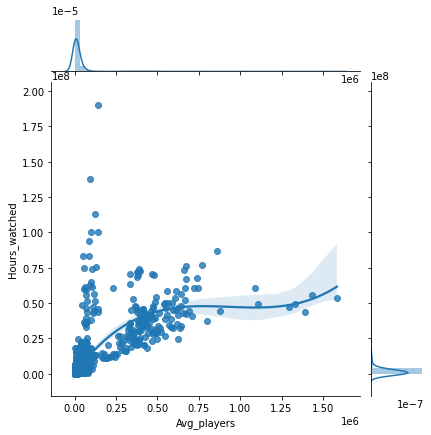

In [40]:
g = sns.JointGrid(x="Avg_players", y="Hours_watched", data=df);
g.plot_joint(sns.regplot, order=3) 
g.plot_marginals(sns.distplot)

In [45]:
# Test train split for supervised training
X_train, X_test, y_train, y_test = train_test_split(df.Avg_players, df.Hours_watched)

In [46]:
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

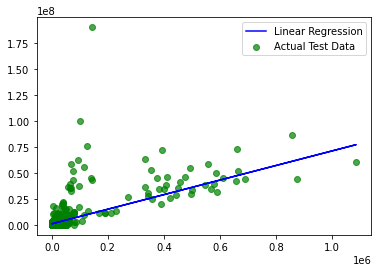

In [49]:
prediction = LR.predict(X_test.values.reshape(-1,1))

plt.plot(X_test, prediction, label='Linear Regression', color='b')
plt.scatter(X_test, y_test, label='Actual Test Data', color='g', alpha=.7)
plt.legend()
plt.show()

In [53]:
y_pred = LR.predict(X_test.values.reshape(-1,1))

In [54]:
#Print result of MAE
print(metrics.mean_absolute_error(y_test, y_pred))
#Print result of MsE
print(metrics.mean_squared_error(y_true, y_pred))
#Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

2544990.3332837094


NameError: name 'y_true' is not defined